In [69]:
%load_ext autoreload
%autoreload 2

import math
import numpy as np
import pandas as pd
from numpy import array
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq
from math import sin, pi
from scipy import signal
import matplotlib.pyplot as plt

from model import *
from view import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
def get_U(t,F,A=1):
    return A*np.sin(2 * np.pi * F * t)

In [71]:
duration = 1000e-6
F_main_real=440e3

fs = F_main_real*20

F_noise_1=100e3
F_noise_2=700e3
F_noise_3=200e3

t = np.linspace(0, duration, int(duration * fs))  

U = get_U(t,F_main_real,2)+get_U(t,F_noise_1)+get_U(t,F_noise_2)+get_U(t,F_noise_3)

In [72]:
R= 100
C= 475e-10

phase_real=math.degrees(np.atan(2*pi*F_main_real*R*C))

t,I= RC_transfer(t,U,R,C)
phase_real

85.64529139817812

440008.81684491975


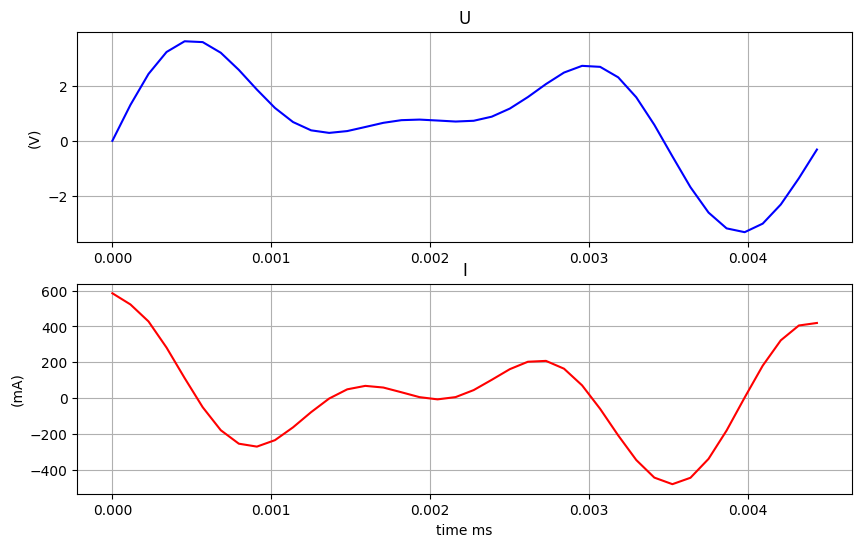

In [73]:
F,V = get_spectrum3([t,U])

F_peak_calc = F[np.argmax(V)]
T=1/F_peak_calc

print(F_peak_calc)

T_counts=convert_to_counts(t,T)

window=T_counts*2

show_I_U(t,I,U,0,window)

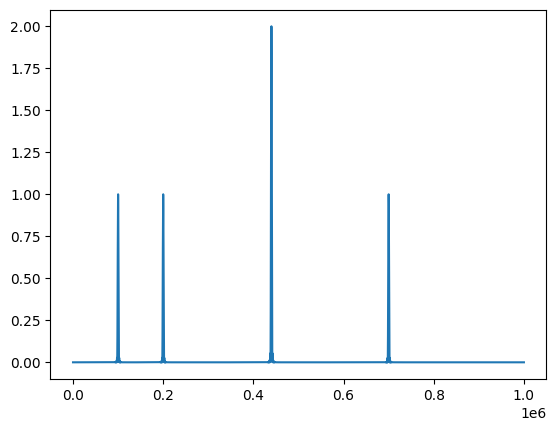

In [74]:
plt.plot(F,V)

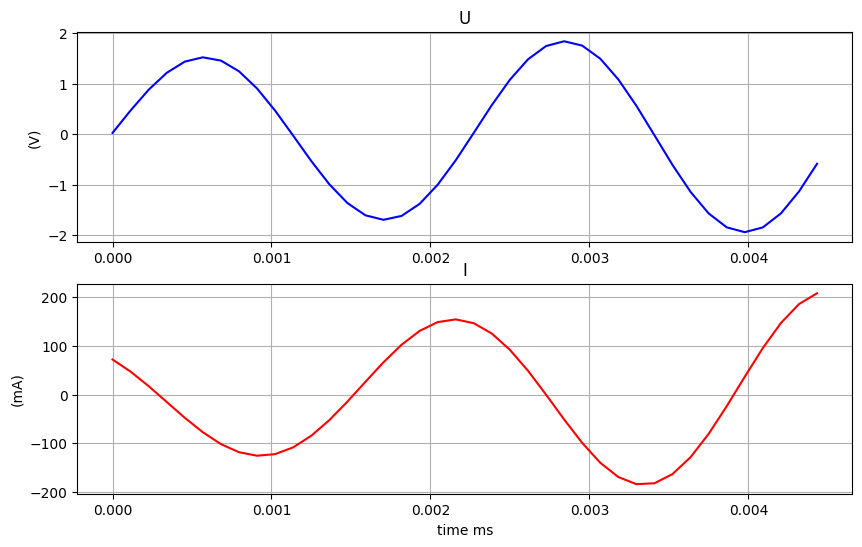

In [75]:
t_f, U_f=filter_butter_bandpass(t,U,F_peak_calc,50e3)
t_f, I_f=filter_butter_bandpass(t,I,F_peak_calc,50e3)

show_I_U(t_f,I_f, U_f,0,window)

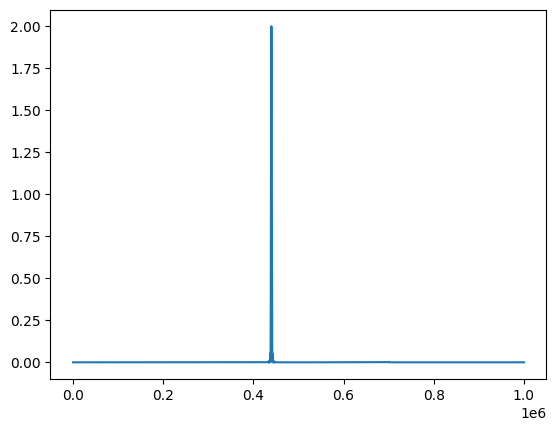

In [76]:
F_f,V_f = get_spectrum3([t,U_f])
plt.plot(F_f,V_f)

np.float64(85.58072771235094)

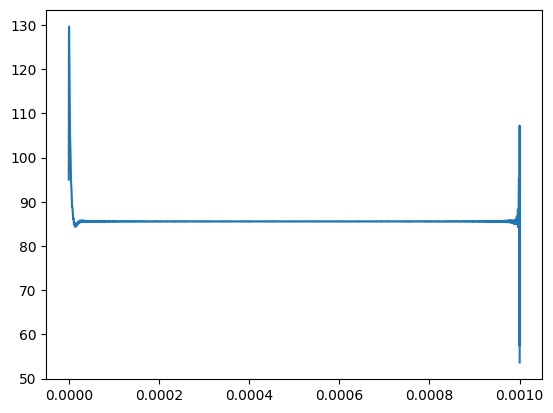

In [77]:
time_hilbert, phase_hilbert=get_phase_hilbert(t_f, U_f, I_f)

plt.plot(time_hilbert, phase_hilbert)

phase_mean=abs(np.mean(phase_hilbert))

central_index=int(len(phase_hilbert)/2)
phase_mean=phase_hilbert[central_index]
phase_mean

[87.49134111 85.31899745 85.59438977 85.57285288 85.57380563 85.57383239
 85.57384275 85.57382504 85.57380417 85.57382017 85.57382213 85.57378707
 85.57377035 85.5737771  85.5737517  85.57370626 85.57369233 85.57368425
 85.57364164 85.57360354 85.57359902 85.57358268 85.57354129 85.57352395
 85.57352939 85.57351078 85.57348368 85.573488   85.57349514 85.57347374
 85.57345968 85.57347085 85.57346563 85.5734385  85.5734304  85.57343284
 85.57340815 85.57337625 85.57336765 85.57335414 85.57331618 85.57328852
 85.57328007 85.57325535 85.57321839 85.57320347 85.57319659 85.57316987
 85.57314659 85.57314619 85.57313925 85.57311602 85.57310779 85.57311272
 85.57309991 85.57308056 85.57307996 85.57307732 85.57305392 85.57303599
 85.57303255 85.57301445 85.57298297 85.57296687 85.5729553  85.57292416
 85.57289368 85.572882   85.57286366 85.57283048 85.57281182 85.57280634
 85.5727854  85.57276082 85.57275765 85.57275505 85.57273435 85.57272248
 85.57272809 85.57271952 85.57269818 85.57268976 85

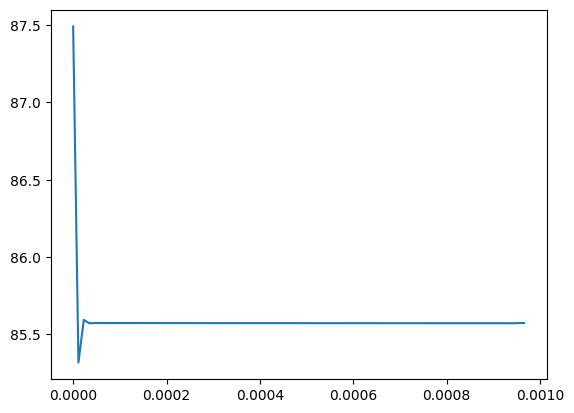

In [78]:
times, phase_diff = get_phase_FFT(U_f, I_f, fs, F_peak_calc, n_periods=10, overlap=0.5)

print (phase_diff)
plt.plot(times, phase_diff)

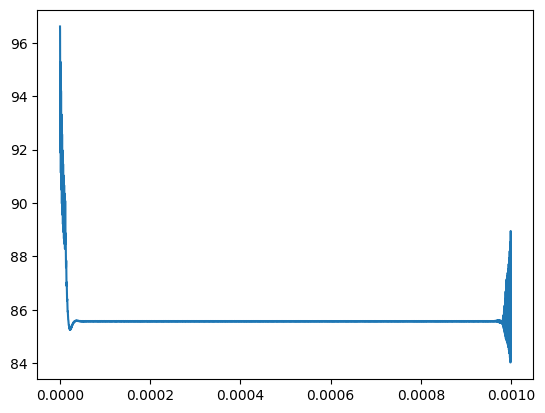

In [79]:
times,phase_diff = lockin_phase_diff(I_f,U_f,fs,F_peak_calc,10)

plt.plot(times,phase_diff)

In [80]:
# Сравнение частоты 

f_rel_real=1/(2*pi*R*C)
f_rel_real

33506.30380882007

In [81]:
f_rel_calc_mean = F_peak_calc * np.cos(phase_mean*0.0174533) / np.sin(phase_mean*0.0174533)
print(f_rel_calc_mean)

34005.43356582351
